In [26]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import scipy.misc
from torch.autograd import Variable
import torch.distributions.multivariate_normal as distribution
import pickle

In [4]:
#device = torch.device('cuda:1'if torch.cuda.is_available()else 'cpu')




transform = transforms.Compose(
   [transforms.ToTensor(),
    transforms.Normalize((0.13,), (0.308,))])





epochs = 5;
lr = 0.1;
batch_size = 1; 
num_classes = 10;





train_dataset = torchvision.datasets.MNIST(root = '/home/anil/data',train =True,transform = transform,download = True)
test_dataset = torchvision.datasets.MNIST(root='home/anil/data',
                                          train=False, 
                                          transform=transform,download = True)





valid_dataset = torchvision.datasets.MNIST(root = '/home/anil/data',train =True,transform = transform,download = True)




num_train = len(train_dataset)
indices = list(range(num_train))
split=int(np.floor(0.2*num_train))



tr_idx,valid_idx = indices[split:],indices[:split]





np.random.seed(0)
np.random.shuffle(indices)





trainsampler = SubsetRandomSampler(tr_idx)
validsampler = SubsetRandomSampler(valid_idx)


trainloader = torch.utils.data.DataLoader(dataset = train_dataset,sampler = trainsampler,batch_size = batch_size,shuffle = False)
testloader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size , shuffle=True)
validloader = torch.utils.data.DataLoader(dataset = train_dataset,sampler = validsampler,batch_size = batch_size,shuffle = False)





#to show image
def process_normal_img(img):
    img = img*0.3081+0.1307
    npimg = img.numpy()
    return (np.transpose(npimg,(1,2,0)))





def process_network_img(img):
    img = img*0.3081+0.1307
    image = img.detach().numpy()
    image = np.transpose(image,(1,2,0))
    image = (image-np.min(image))/(np.max(image)-np.min(image))
    return(image)


class ConvNet(nn.Module):
     def __init__(self,num_classes = 10):
            super (ConvNet,self).__init__()
            self.layer1 = nn.Sequential(
                   nn.Conv2d(1, 32 , kernel_size =3 , stride = 1, padding = 1), #25088
                   nn.BatchNorm2d(32),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2, stride = 2))
            self.layer2 = nn.Sequential(
                   nn.Conv2d(32,32,kernel_size = 3 , stride = 1,padding = 1),
                   nn.ReLU(),
                   nn.MaxPool2d(kernel_size = 2 , stride = 2))
            self.fc1 = nn.Linear(7*7*32,500)
            self.fc2 = nn.Linear(500,10)
            
    
     def forward(self,x):
            x1 = self.layer1(x)
            x2 = self.layer2(x1)
            out = x2.reshape(x2.size(0),-1)
            out = self.fc1(out)
            out = self.fc2(out)
            return(x1,x2,out)






In [5]:
g_noise = distribution.MultivariateNormal(torch.zeros(28,28), torch.eye(28,28))
gnoise= g_noise.sample()

gaussian_noise = torch.zeros(1,1,28,28)
gaussian_noise[0,0,:,:] = gnoise

print(gaussian_noise.shape)

torch.Size([1, 1, 28, 28])


In [6]:
modelroot = '/home/anil/data/MNIST/MNISTsaved/saved_model2'

In [7]:
model = ConvNet()


Reloading
Gaussian Noise Image


/home/anil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # Remove the CWD from sys.path while we load stuff.


(28, 28, 3)


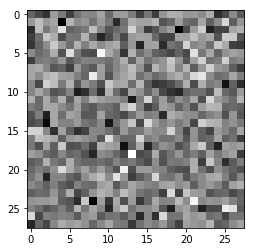

In [8]:
print('Reloading')

model.load_state_dict(torch.load(modelroot))
model.eval()
 
img = process_network_img(torchvision.utils.make_grid(gaussian_noise))
print ('Gaussian Noise Image')
plt.figure()
plt.imshow(img)
scipy.misc.imsave('Gaussian_noise_non_targeted.png', img)
print(img.shape)

In [9]:
softmax = nn.Softmax()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


/home/anil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Iteration:100 Loss:8.435862
Iteration:200 Loss:5.1095247
Iteration:300 Loss:2.3970604
Iteration:400 Loss:0.93497586
Iteration:500 Loss:0.4267707
Iteration:600 Loss:0.2520094
New predicted Label is tensor([0]) with confidence of tensor([0.8008])
Image0


/home/anil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/anil/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


Iteration:100 Loss:0.34733963
New predicted Label is tensor([1]) with confidence of tensor([0.8018])
Image1
New predicted Label is tensor([2]) with confidence of tensor([0.8032])
Image2
Iteration:100 Loss:1.5766873
Iteration:200 Loss:0.440876
New predicted Label is tensor([3]) with confidence of tensor([0.8016])
Image3
Iteration:100 Loss:7.665558
Iteration:200 Loss:4.1914296
Iteration:300 Loss:1.4773638
Iteration:400 Loss:0.46901655
Iteration:500 Loss:0.23656797
New predicted Label is tensor([4]) with confidence of tensor([0.8018])
Image4
New predicted Label is tensor([5]) with confidence of tensor([0.9295])
Image5
Iteration:100 Loss:5.3735957
Iteration:200 Loss:1.6659431
Iteration:300 Loss:0.4533019
New predicted Label is tensor([6]) with confidence of tensor([0.8016])
Image6
Iteration:100 Loss:3.8240595
Iteration:200 Loss:1.1084561
Iteration:300 Loss:0.36103964
New predicted Label is tensor([7]) with confidence of tensor([0.8012])
Image7
Iteration:100 Loss:2.6764584
Iteration:200 Los

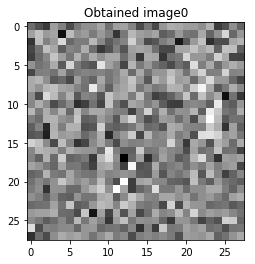

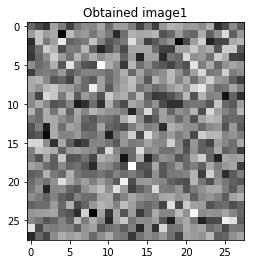

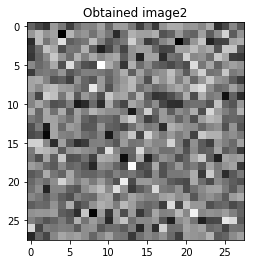

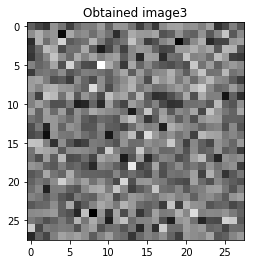

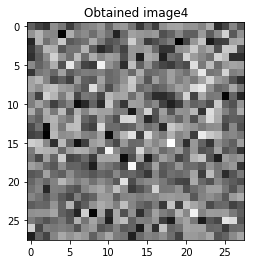

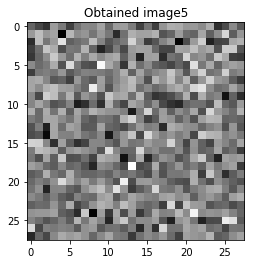

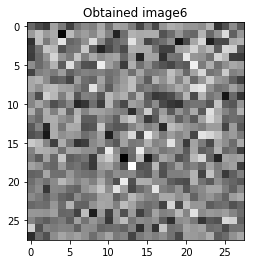

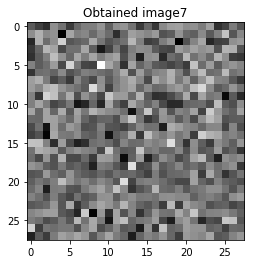

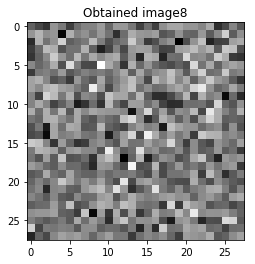

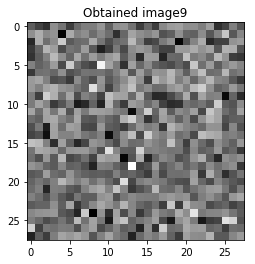

In [10]:

for label_r in range (10):
    cost=[]
    label = torch.ones(1,dtype=torch.int64)*label_r
    image = gaussian_noise.clone()        
    images = Variable (image, requires_grad=True)
    images.grad = None
    p = True
    count = 0
    while p:
        count = count+1
        images = Variable(images, requires_grad= True)  
        optimizer.zero_grad()
        _,_,out = model(images)
        #print(out.shape)
        loss = criterion(out,label)
        loss_ = loss.detach().numpy()
        if count%100 ==99:
            print('Iteration:'+repr(count+1),'Loss:'+str(loss_))
            cost.append(loss_)
        loss.backward()
        gr = images.grad.data
        images = images - 0.01*gr
        pred_con = softmax(out)
        score, predicted = torch.max(pred_con.data, 1)
        if predicted==label:
            if score>0.8:
                p = False
    _,_,output = model(images)
    pred_con = softmax(output)
    score, predicted = torch.max(pred_con.data, 1)
    print('New predicted Label is '+repr(predicted)+' with confidence of '+repr(score))
    
    test_image = process_network_img(torchvision.utils.make_grid(images))
    print('Image'+repr(label_r))
    plt.figure()
    plt.imshow(test_image)
    plt.title('Obtained image'+repr(label_r))
    scipy.misc.imsave(repr(label_r)+'non_targeted.png',test_image)
    
    a = open('Non_targeted'+repr(label_r),'wb')
    pickle.dump(cost,a) 
    a.close()
    
        

In [24]:
print(out.shape)

torch.Size([1, 10])


3


Text(0,0.5,'Cost')

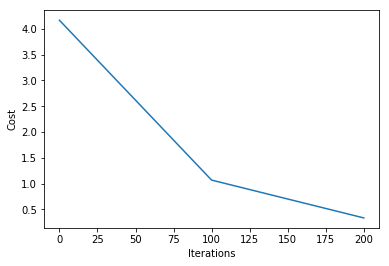

In [28]:
label = 9
a = open('Non_targeted'+repr(label),'rb')
Cost = pickle.load(a)
a.close()
print(len(Cost))
plt.plot(np.arange(len(Cost))*100,Cost)
plt.xlabel('Iterations')
plt.ylabel('Cost')